## Comparison of CAI, tAI and modelled translation efficiencies

In [1]:
import os
import os.path
import cPickle as pkl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np

from Bio import SeqIO
from statsmodels.nonparametric.smoothers_lowess import lowess

### tRNA adaptation index (tAI)

From https://github.com/smsaladi/tAI:

In [2]:
import tAI

In [3]:
tRNA_types = {
    1: {'anticodon': 'ugc', 'abundancy': 55351},  # reverse complement the anticodon to look it up
    2: {'anticodon': 'agc', 'abundancy': 121771},
    3: {'anticodon': 'ucu', 'abundancy': 121771},
    4: {'anticodon': 'ccu', 'abundancy': 11070},
    5: {'anticodon': 'ccg', 'abundancy': 11070},
    6: {'anticodon': 'acg', 'abundancy': 66421},
    7: {'anticodon': 'guu', 'abundancy': 110701},
    8: {'anticodon': 'guc', 'abundancy': 177122},
    9: {'anticodon': 'gca', 'abundancy': 44280},
    10: {'anticodon': 'uug', 'abundancy': 88561},
    11: {'anticodon': 'cug', 'abundancy': 11070},
    12: {'anticodon': 'uuc', 'abundancy': 154982},
    13: {'anticodon': 'ucc', 'abundancy': 33210},
    14: {'anticodon': 'ccc', 'abundancy': 22140},
    15: {'anticodon': 'gcc', 'abundancy': 177122},
    16: {'anticodon': 'gug', 'abundancy': 77491},
    17: {'anticodon': 'uau', 'abundancy': 22140},
    18: {'anticodon': 'aau', 'abundancy': 143911},
    19: {'anticodon': 'uag', 'abundancy': 33210},
    20: {'anticodon': 'gag', 'abundancy': 11070},
    21: {'anticodon': 'uaa', 'abundancy': 77491},
    22: {'anticodon': 'caa', 'abundancy': 110701},
    23: {'anticodon': 'uuu', 'abundancy': 77491},
    24: {'anticodon': 'cuu', 'abundancy': 154982},
    25: {'anticodon': 'cau', 'abundancy': 55351},  # 26 does not seem to exist
    27: {'anticodon': 'gaa', 'abundancy': 110701},
    28: {'anticodon': 'agg', 'abundancy': 22140},
    29: {'anticodon': 'ugg', 'abundancy': 110701},
    30: {'anticodon': 'gcu', 'abundancy': 33210},
    31: {'anticodon': 'uga', 'abundancy': 33210},
    32: {'anticodon': 'aga', 'abundancy': 121771},
    33: {'anticodon': 'cga', 'abundancy': 11070},
    34: {'anticodon': 'ugu', 'abundancy': 44280},
    35: {'anticodon': 'agu', 'abundancy': 121771},
    36: {'anticodon': 'cgu', 'abundancy': 11070},
    37: {'anticodon': 'cca', 'abundancy': 66421},
    38: {'anticodon': 'gua', 'abundancy': 88561},
    39: {'anticodon': 'uac', 'abundancy': 22140},
    40: {'anticodon': 'aac', 'abundancy': 154982},
    41: {'anticodon': 'cac', 'abundancy': 22140},
    42: {'anticodon': '*', 'abundancy': 18000},  # termination factor
    43: {'anticodon': 'cuc', 'abundancy': 22140}
}

In [4]:
bases = list('acgu')

codons = [a + b + c for a in bases for b in bases for c in bases]

Reverse complement:

In [5]:
def complement(s):
    ''' complementary RNA'''
    basecomplement = {'a': 'u', 'c': 'g', 'g': 'c', 'u': 'a'}
    letters = list(s)
    letters = [basecomplement[base] for base in letters]
    return ''.join(letters)

def revcom(s):
    ''' reverse complementary RNA'''
    if s == "*":
        return False
    return complement(s[::-1])

From https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/03%20TRSL_check_observables.ipynb:

In [6]:
anticodon_tRNA_abundancy = {tRNA_types[id]['anticodon']: tRNA_types[id]['abundancy'] for id in tRNA_types}

In [7]:
codon_tRNA_abundancy = {codon: anticodon_tRNA_abundancy[revcom(codon)] if revcom(codon) in 
                        anticodon_tRNA_abundancy else 0 for codon in codons} 

Delete stop codons:

In [8]:
del codon_tRNA_abundancy['uaa']
del codon_tRNA_abundancy['uga']
del codon_tRNA_abundancy['uag']

In [9]:
orfs = pkl.load(open("../../parameters/orf_coding.p", "rb"))

Test case (SWI5, YDR146C):

In [10]:
nucseq = orfs['YDR146C']
nucseq[:60]

'auggauacaucaaacucuugguuugaugccucaaaaguacaaagccuaaauuuugaccua'

In [11]:
codon_tRNA_abundancy_series = pd.Series({key.upper().replace('U', 'T'): codon_tRNA_abundancy[key] 
                                         for key in codon_tRNA_abundancy})

In [12]:
codon_tRNA_abundancy_series

AAA     77491
AAC    110701
AAG    154982
AAT         0
ACA     44280
ACC         0
ACG     11070
ACT    121771
AGA    121771
AGC     33210
AGG     11070
AGT         0
ATA     22140
ATC         0
ATG     55351
ATT    143911
CAA     88561
CAC     77491
CAG     11070
CAT         0
CCA    110701
CCC         0
CCG         0
CCT     22140
CGA         0
CGC         0
CGG     11070
CGT     66421
CTA     33210
CTC     11070
        ...  
CTT         0
GAA    154982
GAC    177122
GAG     22140
GAT         0
GCA     55351
GCC         0
GCG         0
GCT    121771
GGA     33210
GGC    177122
GGG     22140
GGT         0
GTA     22140
GTC         0
GTG     22140
GTT    154982
TAC     88561
TAT         0
TCA     33210
TCC         0
TCG     11070
TCT    121771
TGC     44280
TGG     66421
TGT         0
TTA     77491
TTC    110701
TTG    110701
TTT         0
Length: 61, dtype: int64

### Calculate using tAI from Python and Chu tRNA abundancies
<a id='tai_python'></a>

In [13]:
my_tAI = tAI.tAI(trna_count=codon_tRNA_abundancy_series, bacteria=False)

In [14]:
tAI_dict_python_chu = {}

for orf in orfs:
    tAI_dict_python_chu[orf] = my_tAI.calc(orfs[orf])

### Calculate using tAI from R (Chu et al. data)

Import tAIs from R:

In [15]:
with open('/home/martin/git/TRSL/workbooks/analyses/tAI_misc/yeast.json','r') as inf:
    tAI_dict_R_Chu = eval(inf.read())

In [16]:
tAI_dict_R_Chu['YDR146C']

0.37115

### Calculate using tAI from Python and gtRNAdb (http://gtrnadb.ucsc.edu/genomes/eukaryota/Scere3/)

In [17]:
rootdir = os.getcwd()
datadir = os.path.join(os.getcwd(), "tAI-master/test/data")

In [18]:
tAI_dict_python_from_gtrnadb = {}

my_tai = tAI.tAI.from_gtRNAdb(os.path.join(datadir, r"sacCer3-tRNAs.bed"))

In [19]:
for r in orfs:
    tAI_dict_python_from_gtrnadb[r] = my_tai.calc(orfs[r])

In [20]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, alpha=0.2, xlog=True, ylog=True,
                 xmax=False, ymax=False):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-')
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)
            
    if xmax:
        ax.set_xlim(right=xmax)
    if ymax:
        ax.set_ylim(top=ymax)

    scat = plt.scatter(xs, ys, color='b', alpha=alpha)
    scat.set_alpha(alpha)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs, missing='raise', return_sorted=True)[:,1]
    
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    plt.show()

5917


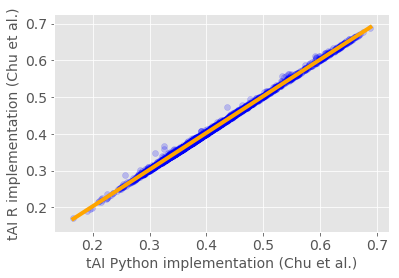

In [21]:
scatter_dicts(tAI_dict_python_chu, tAI_dict_R_Chu, "tAI Python implementation (Chu et al.)", 
              "tAI R implementation (Chu et al.)", 14, 0.2, False, False)

5917


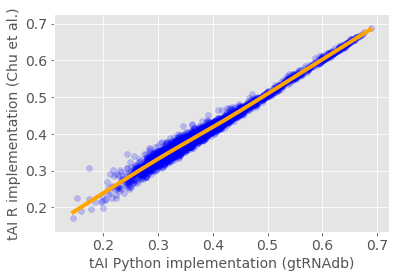

In [22]:
scatter_dicts(tAI_dict_python_from_gtrnadb, tAI_dict_R_Chu, "tAI Python implementation (gtRNAdb)", 
              "tAI R implementation (Chu et al.)", 14, 0.2, False, False)

In [23]:
pd.Series(tAI_dict_python_chu).describe()

count    6713.000000
mean        0.379042
std         0.069379
min         0.166043
25%         0.342188
50%         0.367924
75%         0.402683
max         0.688188
dtype: float64

In [24]:
pd.Series(tAI_dict_python_from_gtrnadb).describe()

count    6713.000000
mean        0.358015
std         0.076301
min         0.141384
25%         0.314824
50%         0.344046
75%         0.384546
max         0.688190
dtype: float64

In [25]:
pd.Series(tAI_dict_R_Chu).describe()

count    5917.000000
mean        0.391639
std         0.066712
min         0.170230
25%         0.353030
50%         0.376540
75%         0.412410
max         0.688190
dtype: float64

We will use tAI_dict_python_chu due to better coverage and identity (where available) to Python implementation.

# TODO: does the following belong to another workbook?

We look at the time-unresolved simulation.

In [26]:
filepath = "../../results/updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah_20170831_1936_200000_ribosomes_3600s.p"

In [27]:
results = pkl.load(open(filepath))

In [28]:
protnames = results['timecourses'].keys()
blacklist = ['ribos._bound', 'ribos._free', 'tRNA_free', 'tRNA_bound', 'ATP', 'GTP', 'AMP', 'GDP', 'protein', 
             'peptide_bonds']
for fragment in blacklist:
    protnames = [name for name in protnames if fragment not in name]

#### A. Protein speeds including the initiation event (the correlation to tAI might be weaker here):

In [29]:
prot_speeds = {}

for prot in protnames:
    start, stop = 599, len(results['timecourses'][prot]) - 1  # 599 to exclude the "burn in" phase
    prot_speeds[prot] = (results['timecourses'][prot][stop] - results['timecourses'][prot][start]) / (1.0 * results['timerange'][stop] - results['timerange'][start])
    # print only the fastest
    if prot_speeds[prot] > 100: 
        print prot, prot_speeds[prot]

YKL060C 145.056037703
YAL038W 123.390424737
YJL189W 115.200862069
YCR012W 112.413069717
YOL086C 117.781194322
YLR110C 108.381609195
YLR044C 193.690729352
YKL152C 115.51755848


In [30]:
pd.Series(prot_speeds.values()).describe()

count    4475.000000
mean        1.349097
std         7.842725
min         0.000287
25%         0.048851
50%         0.123851
75%         0.378315
max       193.690729
dtype: float64

4475


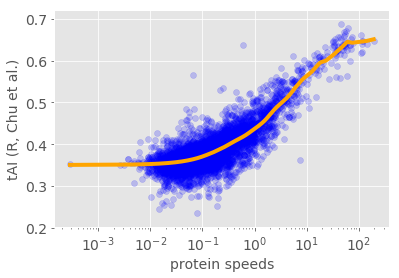

In [31]:
scatter_dicts(prot_speeds, tAI_dict_R_Chu, "protein speeds", "tAI (R, Chu et al.)", 14, 0.2, True, False)

4475


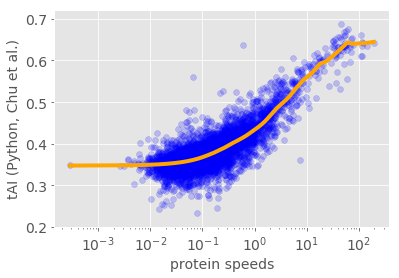

In [32]:
scatter_dicts(prot_speeds, tAI_dict_python_chu, "protein speeds", "tAI (Python, Chu et al.)", 14, 
              0.2, True, False)

Same.

Note that ```prot_speeds``` does contain the mRNA abundance because it counts total number of synthesized protein molecules per time.

#### B. Protein speeds NOT including the initiation event (the correlation to tAI might be stronger here):

We are using the method at https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/03%20TRSL_check_observables.ipynb.

Get the tic_tocs:

In [33]:
transcript_tic_toc = {transcript.index: transcript.tic_toc for transcript in results['transcriptome']}

In [34]:
transcript_tic_toc_averages = {index: np.mean([toc-tic for (tic, toc) in transcript_tic_toc[index]])
                               for index in transcript_tic_toc}

/home/martin/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/martin/.local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
transcript_df = pd.DataFrame(transcript_tic_toc_averages.values(), index=transcript_tic_toc_averages.keys())

In [36]:
transcript_df = pd.DataFrame(pd.Series(transcript_tic_toc_averages))
transcript_df.columns = ['tic_toc']

In [37]:
temp_df = pd.DataFrame(pd.Series({transcript.index: transcript.geneID for transcript in results['transcriptome']}))
temp_df.columns = ['geneID']

In [38]:
transcript_df = pd.merge(transcript_df, temp_df, left_index=True, right_index=True, how='outer')

In [39]:
gene_tic_toc = transcript_df.groupby('geneID').mean().to_dict()['tic_toc']
gene_tic_toc_df = pd.DataFrame.from_dict(gene_tic_toc.items())
gene_tic_toc_df.columns = ['name', 'tic toc [s]']

So the tic toc [s] is the mean by geneID. As such it is already normalized by transcript count.

In [40]:
orf_lengths = {prot: len(orfs[prot]) for prot in orfs}

In [41]:
pd.Series(orf_lengths.values()).describe()

count     6713.000000
mean      1352.414122
std       1139.682772
min         51.000000
25%        534.000000
50%       1077.000000
75%       1767.000000
max      14733.000000
dtype: float64

Still the same (check).

In [42]:
df1 = pd.DataFrame.from_dict(orf_lengths.items())
df1.columns = ['name', 'ORF length [nts]']

In [43]:
df = pd.merge(gene_tic_toc_df, df1, left_on='name', right_on='name', how='outer')

In [44]:
gene_tic_toc_df.set_index('name')

,tic toc [s]
name,
YBR177C,59.901247
YIL140W,100.371746
YLR268W,33.104739
YOR011W,214.940000
YPL043W,75.186086
YJL155C,62.200000
YLL062C,47.686275
YHR067W,51.702703
YAL008W,29.178178


In [45]:
gene_tic_toc_dict = dict(zip(gene_tic_toc_df.name, gene_tic_toc_df['tic toc [s]']))

In [46]:
pkl.dump(gene_tic_toc_dict, open("../../parameters/gene_tic_toc_dict.p", "wb"))

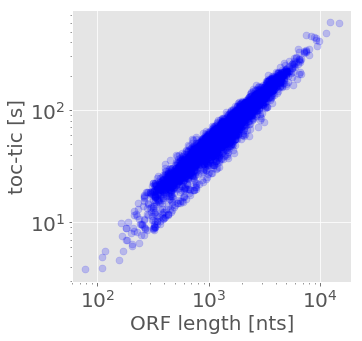

In [47]:
fig = plt.figure(figsize=(5, 5))

ax = plt.gca()
ax.scatter(df['ORF length [nts]'], df['tic toc [s]'], alpha=0.2, s=50, color='b')

ax.set_xlabel('ORF length [nts]', fontsize=20)
ax.set_ylabel('toc-tic [s]', fontsize=20)

plt.setp(plt.gca().get_xticklabels(), fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)

ax.set_yscale('log')
ax.set_xscale('log')

In [48]:
df['Speed'] = df['ORF length [nts]'] / df['tic toc [s]']

In [49]:
df.dropna(how='any', inplace=True)

In [50]:
df.head()

,name,tic toc [s],ORF length [nts],Speed
0,YBR177C,59.901247,1356,22.637258
1,YIL140W,100.371746,2472,24.628445
2,YLR268W,33.104739,645,19.483616
3,YOR011W,214.940000,4185,19.470550
4,YPL043W,75.186086,2058,27.372086


In [51]:
df['Speed'].describe()

count    4475.000000
mean       21.675455
std         3.970934
min        12.443551
25%        19.094572
50%        21.032899
75%        23.287783
max        40.893672
Name: Speed, dtype: float64

In [52]:
tic_toc_speed_dict = dict(zip(df['name'] , df['Speed']))

Semilogarithmic plot:

4475


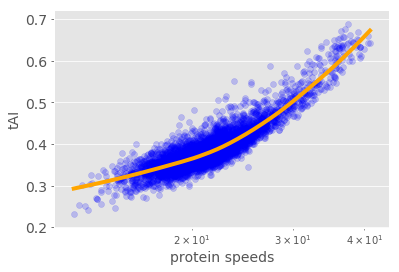

In [53]:
scatter_dicts(tic_toc_speed_dict, tAI_dict_python_chu, "protein speeds", "tAI", 14, 0.2, 
                        True, False)

Inverted and linearly plotted:

4475


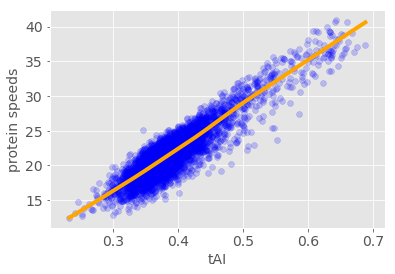

In [54]:
scatter_dicts(tAI_dict_python_chu, tic_toc_speed_dict, "tAI",  "protein speeds", 14, 0.2, False, False)

Beautiful dependence of tic-toc speeds on tRNA adaptation.

#### C. Like A, but divided by transcript count (perhaps not necessary)

In [55]:
transcriptome = pkl.load(open("../../parameters/transcriptome_shah.p", "rb"))

In [56]:
transcriptome_df = pd.DataFrame.from_dict(transcriptome, orient='index', dtype=None)
print len(transcriptome_df)

4839


In [57]:
prot_speeds_df = pd.DataFrame.from_dict(prot_speeds, orient='index', dtype=None)
print len(prot_speeds_df)

4475


In [58]:
total_df = pd.merge(transcriptome_df, prot_speeds_df, left_index=True, right_index=True, how='outer')
print len(total_df)

4839


In [59]:
total_df.columns = ['transcripts', 'prot_speeds']

In [60]:
total_df['prot_speed_per_transcript'] = total_df['prot_speeds'] / total_df['transcripts']
total_df.dropna(how='any', inplace=True)

In [61]:
total_df.head()

,transcripts,prot_speeds,prot_speed_per_transcript
YAL001C,2,0.039083,0.019541
YAL002W,1,0.010920,0.010920
YAL003W,322,53.933559,0.167496
YAL007C,14,0.879074,0.062791
YAL008W,3,0.257199,0.085733


In [62]:
prot_speed_per_transcript_dict = dict(zip(total_df.index, total_df['prot_speed_per_transcript']))

4475


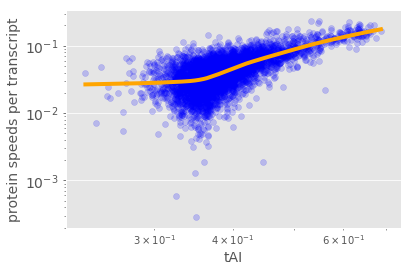

In [63]:
scatter_dicts(tAI_dict_python_chu, prot_speed_per_transcript_dict, "tAI",  "protein speeds per transcript", 
              14, 0.2, True, True)

Interesting. So there is some residual dependency which is not yet captured by tAI alone.

4475


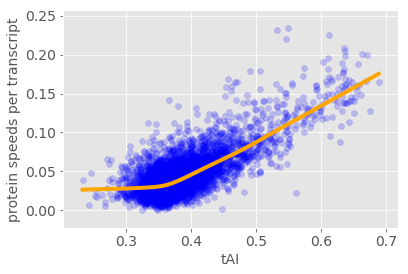

In [64]:
scatter_dicts(tAI_dict_python_chu, prot_speed_per_transcript_dict, "tAI",  "protein speeds per transcript", 
              14, 0.2, False, False)

4716


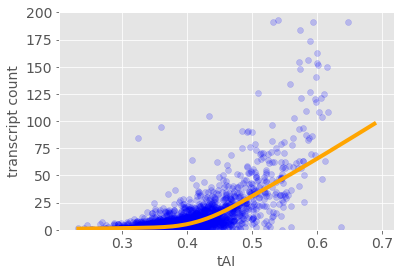

In [65]:
scatter_dicts(tAI_dict_python_chu, transcriptome, "tAI",  "transcript count", 
              14, 0.2, False, False, ymax=200)

Weird. Inverted:

4716


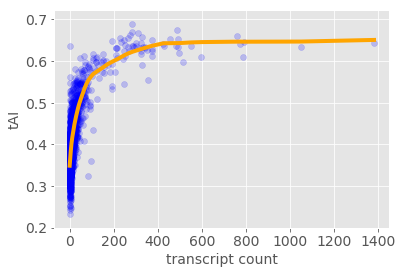

In [66]:
scatter_dicts(transcriptome, tAI_dict_python_chu, "transcript count", "tAI",
              14, 0.2, False, False)

Wow. Cut x axis:

4716


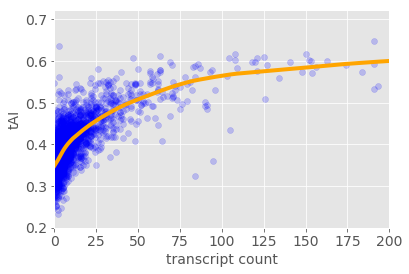

In [67]:
scatter_dicts(transcriptome, tAI_dict_python_chu, "transcript count", "tAI",
              14, 0.2, False, False, xmax=200)

Genes with low expression have lower tAI. (They are more strongly regulated which is partially achieved by codon usage.) This is not a model result!

In [94]:
pkl.dump(tAI_dict_python_chu, open("../../parameters/tAI_python_chu.p", "wb"))

pkl.dump(prot_speeds, open("../../parameters/prot_speeds.p", "wb"))
pkl.dump(tic_toc_speed_dict, open("../../parameters/tic_toc_speed_dict.p", "wb"))
pkl.dump(prot_speed_per_transcript_dict, open("../../parameters/prot_speed_per_transcript_dict.p", "wb"))

### Codon adaptation index (CAI)

Sharp and Li (Nucleic Acids Res. 1987 Feb 11;15(3):1281-95)

https://en.wikipedia.org/wiki/Codon_Adaptation_Index

CAI measures the deviation of a given protein coding gene sequence with respect to a reference set of genes.

CAI is simply defined as the geometric mean of the weight associated to each codon over the length of the gene sequence (measured in codons).

$$\text{CAI}=\exp \left( \frac{1}{L} \sum_{l=1}^L{\log \left(w_i(l)\right)}\right)$$

where $$w_i=\frac{f_i}{\max(f_j)} \qquad i,j \in [\text{synonymous codons for amino acid}]$$

In [69]:
import os.path
from Bio.SeqUtils.CodonUsage import CodonAdaptationIndex

In [70]:
CAI = CodonAdaptationIndex()

In [71]:
datadir = "../../data"
sequencefile = "orf_coding.fasta"
#sequencefile = "orf_coding_all.fasta" # not working (stops at a pseudogene fragment)
sequencefile = os.path.join(datadir, sequencefile)

In [72]:
CAI.generate_index(sequencefile)

In [73]:
handle = open(sequencefile, "rU")
record_dict = SeqIO.to_dict(SeqIO.parse(handle, "fasta"))
handle.close()
orf_genomic_dict = {key:str(record_dict[key].seq).lower().replace('t', 'u') for key in record_dict}

Generate a dictionary of all CAIs:

In [74]:
cai_dict = {}
for gene in orf_genomic_dict:
    orf_genomic_dict[gene] = orf_genomic_dict[gene].replace('u', 't')
    cai_dict[gene] = CAI.cai_for_gene(orf_genomic_dict[gene])

In [75]:
pkl.dump(cai_dict, open("../../parameters/cai_dict.p", "wb"))

Scatter CAI vs tAI:

5917


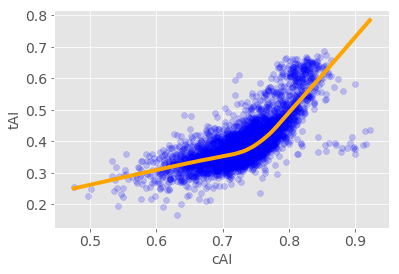

In [76]:
scatter_dicts(cai_dict, tAI_dict_python_chu, "cAI", "tAI", 14, 0.2, False, False)

Scatter CAI vs tic_toc_speed_dict:

4475


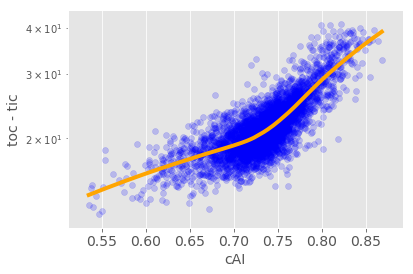

In [77]:
scatter_dicts(cai_dict, tic_toc_speed_dict, "cAI", "toc - tic", 14, 0.2, False, True)

Not logarithmic:

4475


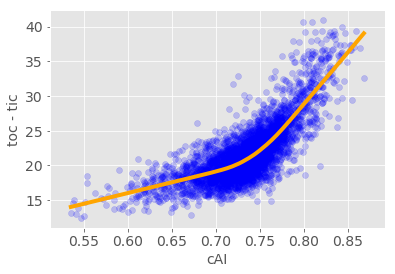

In [78]:
scatter_dicts(cai_dict, tic_toc_speed_dict, "cAI", "toc - tic", 14, 0.2, False, False)

### tAI vs position on gene

Next we check tAI vs length (to test the ramp - beginning of gene should be slower, hence have lower translation efficiency, hence lower (?) tAI).

We need to take only ORFs longer than x and then take the first 30, 60, 90, 120 nts and calculate their tAI.

In [79]:
pd.Series(orf_lengths).describe()

count     6713.000000
mean      1352.414122
std       1139.682772
min         51.000000
25%        534.000000
50%       1077.000000
75%       1767.000000
max      14733.000000
dtype: float64

First we filter for only genes whose ORFs are at least (3 * 250 + 3) nts long. (We will cut away the start codon which is nearly constant.)

In [80]:
long_orfs = {gene: orfs[gene] for gene in orfs if len(orfs[gene]) >= 3 * 250 + 3}

In [81]:
len(long_orfs)

4330

Still lots of ORFs.

Hypothesis: "We describe a universally conserved translation efficiency profile that features low translation efficiency over the first ∼30–50 codons of mRNAs." (http://www.sciencedirect.com/science/article/pii/S0092867410003193)

We now calculate the tAI for the first, second,... , n-th ```width``` nts and average it across the long ORFs:

List of "regional" dicts:

We start with 30 codons (90 nts):

In [82]:
width = 90  # must be divisible by 3!!!
n = 4

In [83]:
start_regions_sliced_by_width = [{gene: long_orfs[gene][i * width + 3: (i + 1) * width + 3] for gene in long_orfs} 
                                 for i in range(n)]

In [84]:
print len(start_regions_sliced_by_width)
print len(start_regions_sliced_by_width[0])

4
4330


tAI calculation ([see above](#tai_python)):

In [85]:
tai_2 = tAI.tAI(trna_count=codon_tRNA_abundancy_series, bacteria=False)

In [86]:
xs = []
ys = []

for i in range(n):
    xs.append((i + 0.5) * width + 3)
    ys.append(np.average([tai_2.calc(start_regions_sliced_by_width[i][gene]) 
                         for gene in start_regions_sliced_by_width[i] 
                         if not np.isnan(tai_2.calc(start_regions_sliced_by_width[i][gene]))]))
print xs
print ys

[48.0, 138.0, 228.0, 318.0]
[0.36852887215255403, 0.37848598373000891, 0.38276465598848924, 0.38292160422357091]


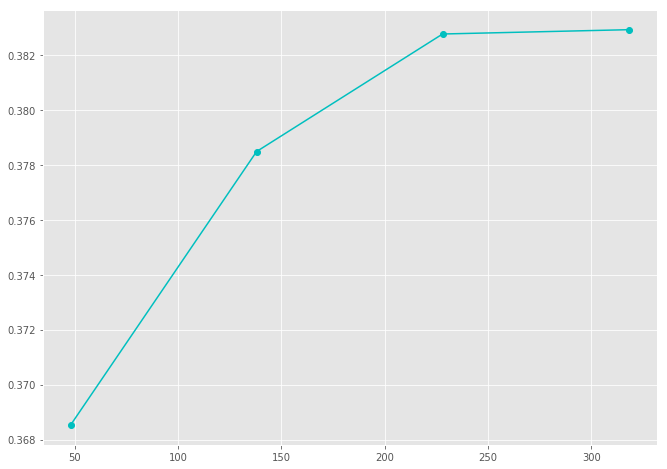

In [87]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(xs, ys, label='tAI for 90 nt buckets', color='c', marker='o')

Next we try 50 codons (150 nts):

In [88]:
width = 150  # must be divisible by 3!!!
n = 4

In [89]:
start_regions_sliced_by_width = [{gene: long_orfs[gene][i * width + 3: (i + 1) * width + 3] for gene in long_orfs} 
                                 for i in range(n)]

In [90]:
print len(start_regions_sliced_by_width)
print len(start_regions_sliced_by_width[0])

4
4330


tAI calculation ([see above](#tai_python)):

In [91]:
tai_2 = tAI.tAI(trna_count=codon_tRNA_abundancy_series, bacteria=False)

In [92]:
xs = []
ys = []

for i in range(n):
    xs.append((i + 0.5) * width + 3)
    ys.append(np.average([tai_2.calc(start_regions_sliced_by_width[i][gene]) 
                         for gene in start_regions_sliced_by_width[i] 
                         if not np.isnan(tai_2.calc(start_regions_sliced_by_width[i][gene]))]))
print xs
print ys

[78.0, 228.0, 378.0, 528.0]
[0.36997650940020271, 0.38041586690902479, 0.38314886950326127, 0.3889532102008616]


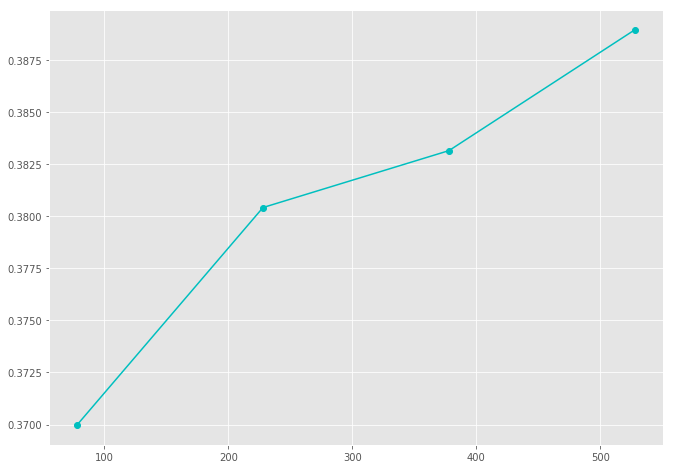

In [93]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(xs, ys, label='tAI for 150 nt buckets', color='c', marker='o')